In [4]:
import scipy.sparse
import pyemma
import numpy as np

In [14]:
#script used to load trajectories and compute input data for the pca using the barnaba software, skip to the next cell to directly load the data


from importlib.machinery import SourceFileLoader
bb = SourceFileLoader("barnbaba","/net/sbp/sbpstore1/vpiompon/barnaba/barnaba/__init__.py").load_module()


resA=['A_9_0','A_10_0','U_11_0','A_12_0','U_29_1','A_30_1','U_31_1','U_32_1']
resI=['I_9_0','I_10_0','U_11_0','I_12_0','U_29_0','I_30_0','U_31_0','U_32_0']
resi=[resA, resI, resI, resI]
data=[]

tops = ["../../A_dsRNA/rna.pdb","../prova.pdb","../prova.pdb","../prova.pdb"]
trajs=["../../A_dsRNA/1000_dump.xtc","MD_ensemble/1000_dump.xtc","MD+NMR_ensemble/1000_dump.xtc","MD+NMR+SAXS/1000_dump.xtc"]
ind=[8,9,10,11,28,29,30,31]

for i in range(4):
    
    angles_s,res_s = bb.backbone_angles(trajs[i],topology=tops[i], residues=resi[i])
    angles_s=np.reshape(angles_s, (len(angles_s), -1))

    angles_s_cos = np.cos(angles_s)
    angles_s_sin = np.sin(angles_s) 
    
    angles_su,rr = bb.sugar_angles(trajs[i],topology=tops[i], residues=resi[i])
    angles_su=np.reshape(angles_su, (len(angles_su), -1))
    
    angles_su_cos=np.cos(angles_su)
    angles_su_sin=np.sin(angles_su)
    
    del angles_s
    del angles_su
    
    gvec,seq = bb.dump_gvec(trajs[i],topology=tops[i])
    Gvecs=gvec[:,:,ind,:]
    Gvecs=Gvecs[:,ind,:,:]
    del gvec
    Gvecs=np.reshape(Gvecs, (len(Gvecs), -1))
    data.append(np.concatenate((Gvecs,angles_s_cos, angles_s_sin, angles_su_cos, angles_su_sin), axis=1))


conc_data=np.array(data).reshape(-1,448)
np.save("input_pca",conc_data)

FileNotFoundError: [Errno 2] No such file or directory: '/net/sbp/sbpstore1/vpiompon/barnaba/barnaba/__init__.py'

In [13]:
conc_data=np.load("input_pca.npy")
comp=pyemma.coordinates.pca(conc_data, dim=2)
comp=comp.get_output()

/u/area/vpiomponi/scratch/localcolabfold/colabfold-conda/lib/python3.10/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "pca". Called from /u/area/vpiomponi/scratch/localcolabfold/colabfold-conda/lib/python3.10/site-packages/decorator.py line 232. Use sklearn.decomposition.PCA instead.
  return caller(func, *(extras + args), **kw)


ImportError: /orfeo/cephfs/scratch/area/vpiomponi/localcolabfold/colabfold-conda/bin/../lib/libstdc++.so.6: version `CXXABI_1.3.15' not found (required by /u/area/vpiomponi/scratch/localcolabfold/colabfold-conda/lib/python3.10/site-packages/pyemma/_ext/variational/estimators/covar_c/_covartools.cpython-310-x86_64-linux-gnu.so)

In [15]:
from scipy.stats import gaussian_kde
import scipy.stats as st


i=0

ben=np.array(comp[0][le*i:le*(i+1),0])
twi=np.array(comp[0][le*i:le*(i+1),1])


# Extract x and y
x = ben
y = twi
# Define the borders
#deltaX = (max(x) - min(x))/10
#deltaY = (max(y) - min(y))/10
#xmin = min(x) - deltaX
#xmax = max(x) + deltaX
#ymin = min(y) - deltaY
#ymax = max(y) + deltaY
#print(xmin, xmax, ymin, ymax)
# Create meshgrid
xmin=-5
xmax=2
ymin=-5
ymax=3.5
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

Text(0.5, 1.0, 'Adenosine Ensemble')

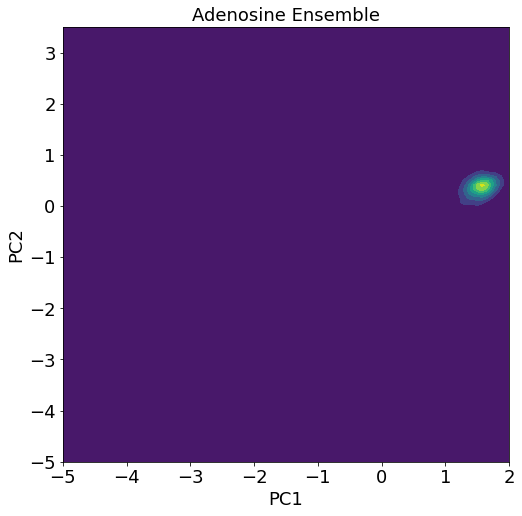

In [16]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

cfset = ax.contourf(xx, yy, f)
#ax.imshow(np.rot90(f), extent=[0, 120, 0, 40])

ax.set_xlabel('PC1', fontsize=18)
ax.set_ylabel('PC2', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)
plt.title('Adenosine Ensemble', fontsize=18)

Text(0.5, 1.0, 'Inosine Ensemble')

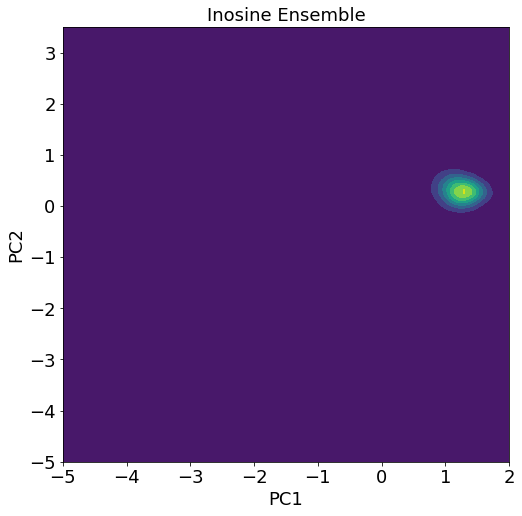

In [17]:
i=1

ben=np.array(comp[0][le*i:le*(i+1),0])
twi=np.array(comp[0][le*i:le*(i+1),1])


# Extract x and y
x = ben
y = twi
# Define the borders
#deltaX = (max(x) - min(x))/10
#deltaY = (max(y) - min(y))/10
#xmin = min(x) - deltaX
#xmax = max(x) + deltaX
#ymin = min(y) - deltaY
#ymax = max(y) + deltaY
#print(xmin, xmax, ymin, ymax)
# Create meshgrid
xmin=-5
xmax=2
ymin=-5
ymax=3.5
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)


fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

cfset = ax.contourf(xx, yy, f)
#ax.imshow(np.rot90(f), extent=[0, 120, 0, 40])

ax.set_xlabel('PC1', fontsize=18)
ax.set_ylabel('PC2', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)
plt.title('Inosine Ensemble', fontsize=18)

Text(0.5, 1.0, 'Inosine (ME_JC) Ensemble')

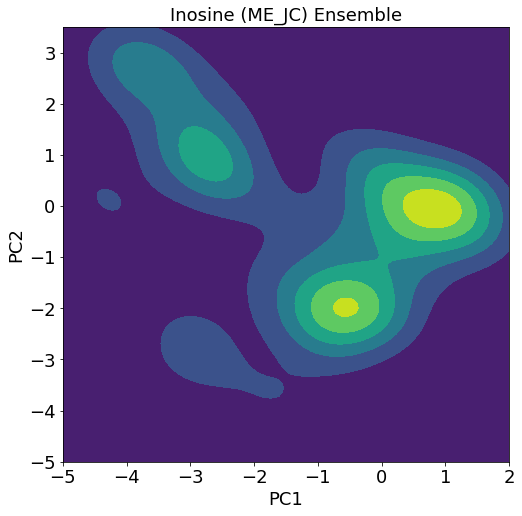

In [18]:
i=2

ben=np.array(comp[0][le*i:le*(i+1),0])
twi=np.array(comp[0][le*i:le*(i+1),1])


# Extract x and y
x = ben
y = twi
# Define the borders
#deltaX = (max(x) - min(x))/10
#deltaY = (max(y) - min(y))/10
#xmin = min(x) - deltaX
#xmax = max(x) + deltaX
#ymin = min(y) - deltaY
#ymax = max(y) + deltaY
#print(xmin, xmax, ymin, ymax)
# Create meshgrid
xmin=-5
xmax=2
ymin=-5
ymax=3.5
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)


fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

cfset = ax.contourf(xx, yy, f)
#ax.imshow(np.rot90(f), extent=[0, 120, 0, 40])

ax.set_xlabel('PC1', fontsize=18)
ax.set_ylabel('PC2', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)
plt.title('Inosine (ME_JC) Ensemble', fontsize=18)

Text(0.5, 1.0, 'Inosine (ME_JC&rG) Ensemble')

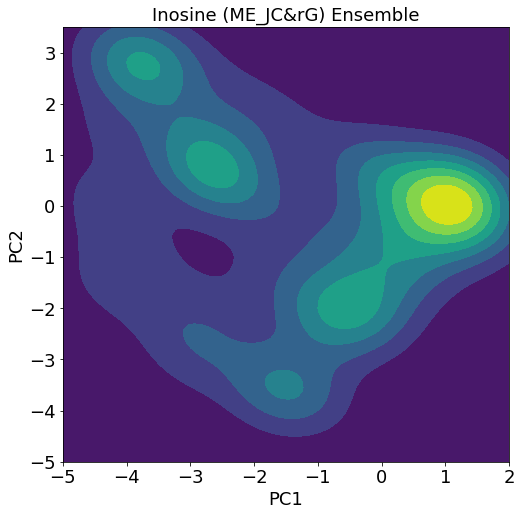

In [19]:
i=3

ben=np.array(comp[0][le*i:le*(i+1),0])
twi=np.array(comp[0][le*i:le*(i+1),1])


# Extract x and y
x = ben
y = twi
# Define the borders
#deltaX = (max(x) - min(x))/10
#deltaY = (max(y) - min(y))/10
#xmin = min(x) - deltaX
#xmax = max(x) + deltaX
#ymin = min(y) - deltaY
#ymax = max(y) + deltaY
#print(xmin, xmax, ymin, ymax)
# Create meshgrid
xmin=-5
xmax=2
ymin=-5
ymax=3.5
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)


fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

cfset = ax.contourf(xx, yy, f)
#ax.imshow(np.rot90(f), extent=[0, 120, 0, 40])

ax.set_xlabel('PC1', fontsize=18)
ax.set_ylabel('PC2', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)
plt.title('Inosine (ME_JC&rG) Ensemble', fontsize=18)

Clustering

In [15]:
import numpy as np
PC1=np.load('PC1.npy')
PC2=np.load('PC2.npy')

In [16]:
Matrix=np.zeros((1000,1000))

for i in range(1000):
    for j in range(1000):
        Matrix[i][j]=np.sqrt((PC1[3000+i]-PC1[3000+j])**2+(PC2[3000+i]-PC2[3000+j])**2)

In [18]:
from importlib.machinery import SourceFileLoader
#bl = SourceFileLoader("bussilab","/net/sbp/sbpstore1/vpiompon/py-bussilab/bussilab/__init__.py").load_module()
bl = SourceFileLoader("bussilab","/u/area/vpiomponi/scratch/py-bussilab/bussilab/__init__.py").load_module()

bl

cluster=bl.clustering.qt(Matrix, cutoff=1.2, weights=None, max_clusters=5)

/u/area/vpiomponi/scratch/py-bussilab/bussilab/coretools.py:42: UserWarning: There was a problem importing numba, jit functions will work but will be MUCH slower.
  warnings.warn("There was a problem importing numba, jit functions will work but will be MUCH slower.")


In [21]:
rest=[]
for i in range(1000):
    app=0
    for k in range(5):
        for j in range(len(cluster.clusters[k])):
            if cluster.clusters[k][j]==i:
                app=1
    if app<1:
        rest.append(i)
rest=np.array(rest)        

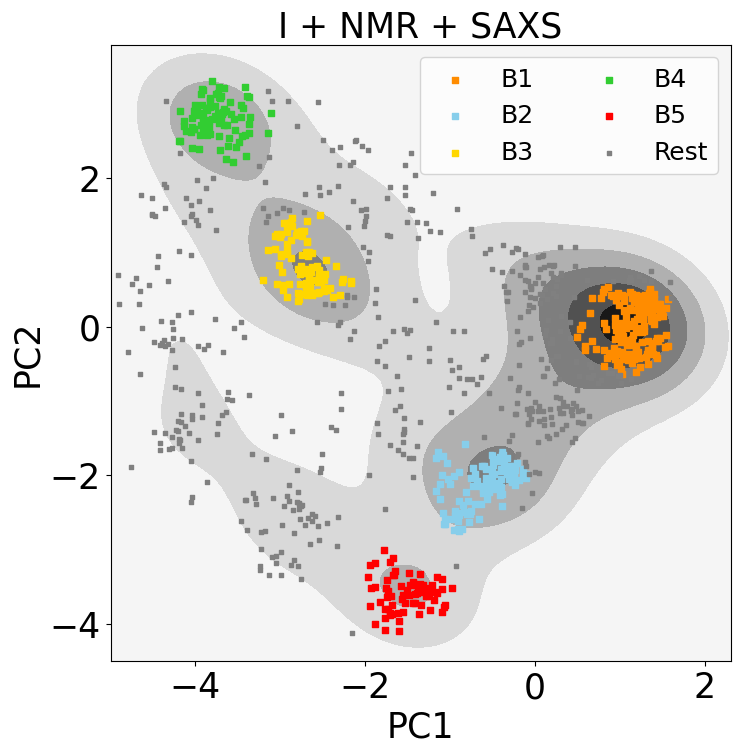

In [22]:
import matplotlib.pyplot as plt

from scipy.stats import gaussian_kde
import scipy.stats as st


ben=PC1[3000:]
twi=PC2[3000:]


# Extract x and y
x = ben
y = twi

xmin=-5
xmax=2.3
ymin=-4.5
ymax=3.8
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)


fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

cfset = ax.contourf(xx, yy, f, cmap='Greys')
#ax.imshow(np.rot90(f), extent=[0, 120, 0, 40])
pnt3d=ax.scatter(x[cluster.clusters[0]], y[cluster.clusters[0]],marker='s', s=25, color='darkorange', label='B1')
pnt3d=ax.scatter(x[cluster.clusters[1]], y[cluster.clusters[1]],marker='s', s=25, color='skyblue', label='B2')
pnt3d=ax.scatter(x[cluster.clusters[2]], y[cluster.clusters[2]],marker='s', s=25, color='gold', label='B3')
pnt3d=ax.scatter(x[cluster.clusters[3]], y[cluster.clusters[3]],marker='s', s=25, color='limegreen', label='B4')
pnt3d=ax.scatter(x[cluster.clusters[4]], y[cluster.clusters[4]],marker='s', s=25, color='red', label='B5')
pnt3d=ax.scatter(x[rest], y[rest],marker='s', s=10, color='grey', label='Rest')


ax.set_xlabel('PC1', fontsize=25)
ax.set_ylabel('PC2', fontsize=25)
ax.tick_params(axis='both', which='major', labelsize=25)
plt.title('I + NMR + SAXS', fontsize=25)
plt.legend(fontsize=18, ncol=2)
